## XGBOOST

In [ ]:
#pip install xgboost

#### Importing required Libraries

In [37]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE,r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

#### Loading the Data Set

In [3]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\MagicBricks.csv")
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


#### Checking shape of data

In [4]:
df.shape

(1259, 11)

#### Checking info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


#### checking missing values

<AxesSubplot:>

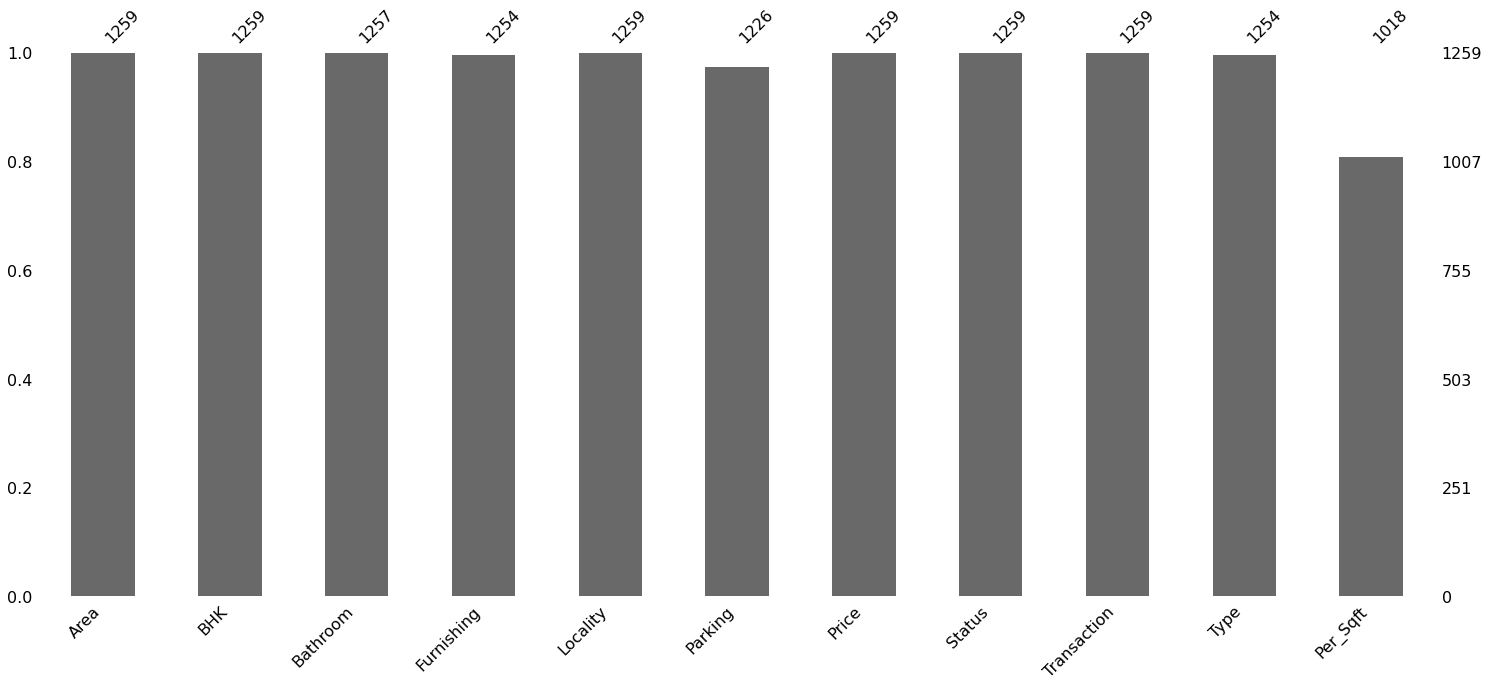

In [6]:
import missingno as msno
msno.bar(df)

In [7]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

#### Filling the missing values

In [9]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=="O":
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if ((df[i].dtype=="int") or  (df[i].dtype=="float")):
                df[i]=df[i].fillna(df[i].mean())
df.isnull().sum().sum()

0

- No missing values

#### Checking unique values

In [10]:
#for i in df.select_dtypes(include="object").columns:
    #print(i,"-------",df[i].unique(),"-------------",df[i].nunique())

#### Dropping irrelevant columns

In [11]:
df.drop(columns=["Locality"],inplace=True)

#### Encoding

In [12]:
le=LabelEncoder()

In [13]:
df["Furnishing"]=le.fit_transform(df["Furnishing"])

In [14]:
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,1,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,0,1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,1,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,1,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [15]:
df=pd.get_dummies(columns=["Status","Transaction","Type"],drop_first=True,data=df)

In [16]:
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Per_Sqft,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,3,2.0,1,1.0,6500000,15690.136542,1,0,1
1,750.0,2,2.0,1,1.0,5000000,6667.000000,1,0,0
2,950.0,2,2.0,0,1.0,15500000,6667.000000,1,1,0
3,600.0,2,2.0,1,1.0,4200000,6667.000000,1,1,1
4,650.0,2,2.0,1,1.0,6200000,6667.000000,1,0,1


#### Seggregate X and Y

In [18]:
x=df.drop(columns="Price")
y=df["Price"]

#### Dividing the data set into train and test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### Getting shape of train and test Data

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(944, 9)
(944,)
(315, 9)
(315,)


In [21]:
xgb1=xgb.XGBRegressor()

In [22]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Prediction

In [23]:
y_pred=xgb1.predict(x_test)

#### Accuracy on Test

In [24]:
r2(y_test,y_pred)

0.8434318048590334

#### Accuracy on training

In [25]:
y_pred_train=xgb1.predict(x_train)

In [26]:
r2(y_train,y_pred_train)

0.9973386192841298

####  hyperparameter Tuning

#### Seeing combination of hyperparameters by grid_search

In [38]:
grid_param = {
    'n_estimators': [10,50,100,500,200],
    'learning_rate' : [0.0001,0.01,0.001,1.0]
   }

In [39]:
grid_search = GridSearchCV(estimator=XGBRegressor(),
                     param_grid=grid_param,
                    n_jobs =-1,cv=10,scoring="r2") 


In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
           

In [41]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.01, 'n_estimators': 200}


In [42]:
grid_search.best_score_  ## accuracy on training

0.7222458330602883

In [43]:
xgb_h = XGBRegressor(**best_parameters)    

In [44]:
xgb_h.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
y_pred=xgb_h.predict(x_test)

In [46]:
r2(y_test,y_pred)

0.7737073643737118

In [47]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred=lr.predict(x_test)
r2(y_test,y_pred)

0.5729286999719425

- Worst performance by linear regression as data is not linear.
- Ensemble Technique will give the best result.